# Group 3 - Credit Card Fraud Detection
### Pre-processing  - Retrieve  & prepare the data:
Loading and checking the data

In [5]:
"""
from google.colab import drive
drive.mount('D:/centennialcollege/winter2024/Comp247/groupproject/drive')

SyntaxError: incomplete input (1678581553.py, line 1)

In [11]:
import pandas as pd
seed=42
df = pd.read_csv('D:/centennialcollege/winter2024/Comp247/groupproject/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
print("Rows & Columns:\n", df.shape)
print("\nColumn Names:\n", list(df.columns))
print("\nColumn Names and data types\n", df.dtypes)

Rows & Columns:
 (284807, 31)

Column Names:
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Column Names and data types
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [13]:
print("0 = Normal Transaction, 1 = Fraud\n\n", df['Class'].value_counts())
print()
print(round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset are normal transactions')
print(round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset are fraud transactions')

0 = Normal Transaction, 1 = Fraud

 Class
0    284315
1       492
Name: count, dtype: int64

99.83 % of the dataset are normal transactions
0.17 % of the dataset are fraud transactions


In [14]:
print("Missing Values in Dataset: ", df.isnull().sum().max())

Missing Values in Dataset:  0


In [15]:
print("Stats:\n", df.describe())

Stats:
                 Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00 

#### Data Visualization

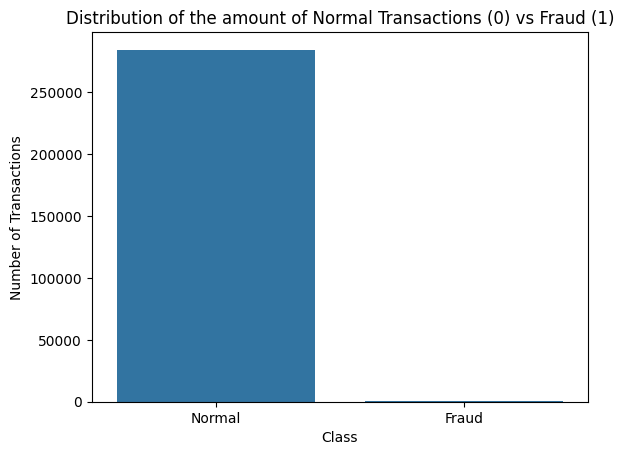

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Number of Transactions')
plt.title('Distribution of the amount of Normal Transactions (0) vs Fraud (1)')
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

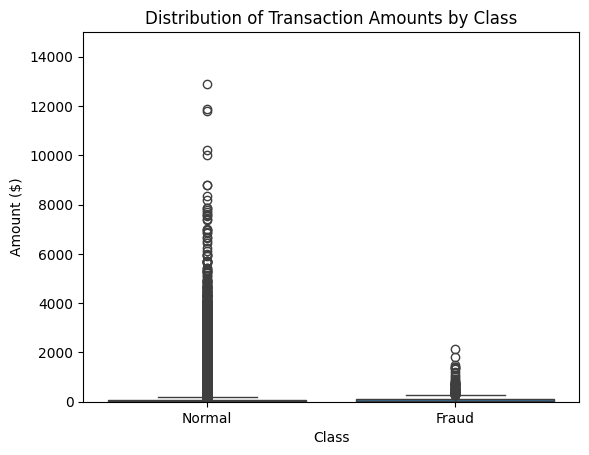

In [17]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Distribution of Transaction Amounts by Class')
plt.ylim(0, 15000)
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.xlabel('Class')
plt.ylabel('Amount ($)')
plt.show()

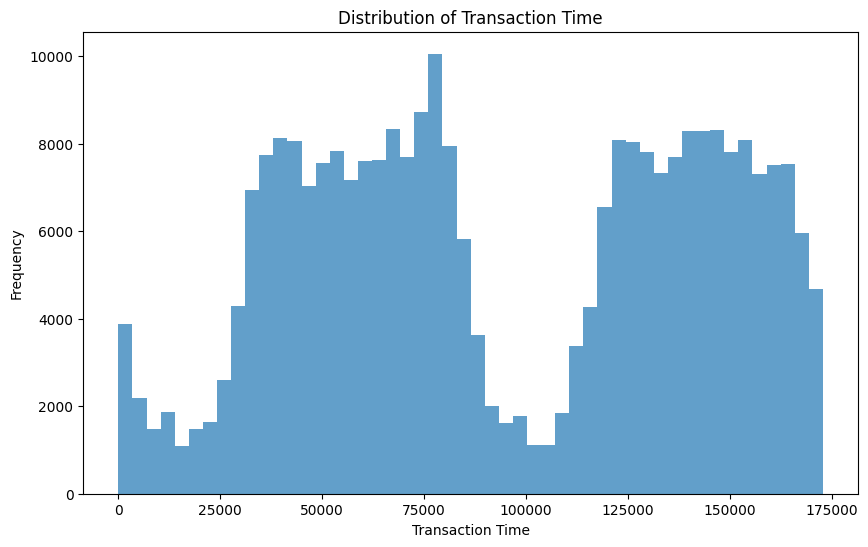

In [18]:
# Plotting the distribution of transaction time
plt.figure(figsize=(10, 6))
plt.hist(df['Time'], bins=50, alpha=0.7)
plt.xlabel('Transaction Time')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Time')
plt.show()

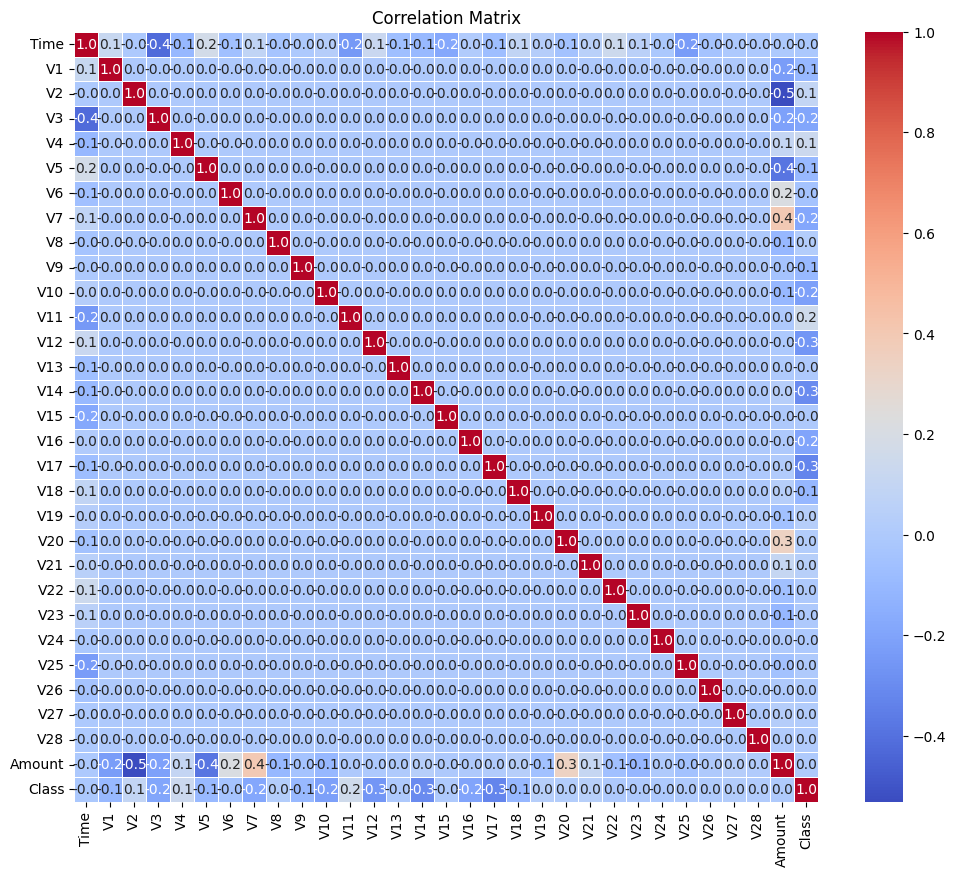

In [19]:
#Correlation Heatmap of V1 to V28
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Data Cleaning & Transformation

Scale Time and Amount columns and create a sub sample of the dataframe in order to have an equal amount of Fraud and Non-Fraud cases

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

pipeline = Pipeline([
    ('scaling', ColumnTransformer([
        ('scale_amount_time', StandardScaler(), [0, 29])  #Scaling 1st column(Time) and 30th column(Amount)
    ], remainder='passthrough'))
])

# Apply pipepline
df_transformed = pipeline.fit_transform(df)

# Extract scaled Time and Amount from transformed df
scaled_time = df_transformed[:, 0]
scaled_amount = df_transformed[:, 1]

# Drop the original 'Amount' and 'Time' columns from original df
df.drop(['Amount', 'Time'], axis=1, inplace=True)

# Insert scaled 'Amount' and 'Time' back into df
df.insert(0, 'Scaled_Amount', scaled_amount)
df.insert(1, 'Scaled_Time', scaled_time)

df.head()

,Scaled_Amount,Scaled_Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


Since Classes are highly skewed, have a normal distribution of the classes using Random User-Sampling.

In [21]:

from imblearn.combine import SMOTEENN
import pandas as pd
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  


X = df.drop('Class', axis=1)
y = df['Class']


# Combination of oversampling and undersampling using SMOTEENN
smoteenn = SMOTEENN(random_state=seed)
X_resampled_smoteenn, y_resampled_smoteenn = smoteenn.fit_resample(X, y)


In [22]:
from sklearn.utils import resample


# Sample size 
sample_size = 20000

# Randomly sample from the dataset
X_sampled_random, y_sampled_random = resample(X_resampled_smoteenn, y_resampled_smoteenn, n_samples=sample_size, random_state=seed)


Distribution of the Classes in the SMOTEENN resampled dataset
Class
1    0.50145
0    0.49855
Name: count, dtype: float64


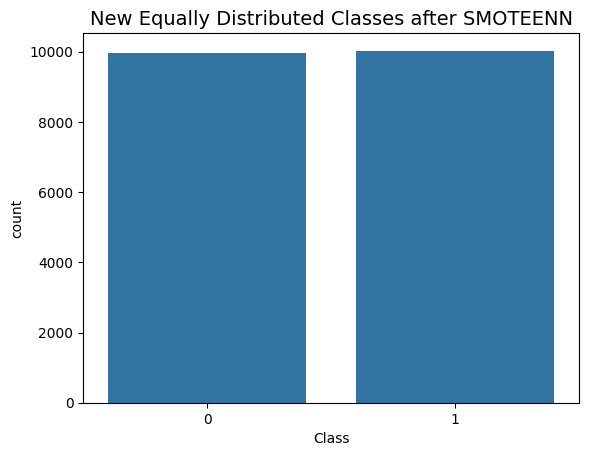

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


# Visualize the distribution of classes after using SMOTEENN
print('Distribution of the Classes in the SMOTEENN resampled dataset')
print(y_sampled_random.value_counts()/len(y_sampled_random))

sns.countplot(x=y_sampled_random)
plt.title('New Equally Distributed Classes after SMOTEENN', fontsize=14)
plt.show()


# Split data into 70% training and 30% testing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Separate Features from class



# Split the data into training and testing sets
seed = 42
train_X, test_X, train_y, test_y = train_test_split(X_sampled_random , y_sampled_random, test_size=0.3, random_state=seed)

# Feature selection on the training data
selector = SelectKBest(f_classif, k=10)
train_X_new = selector.fit_transform(train_X, train_y)
best_features_indices = selector.get_support(indices=True)
print("Best Features: ", train_X.columns[best_features_indices])

# Transform testing data using the selected features
test_X_new = selector.transform(test_X)

Best Features:  Index(['V2', 'V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17'], dtype='object')


# Logistic Regression


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
#  Logistic regression model
linear_clf = LogisticRegression()
linear_clf.fit(train_X, train_y)

# Predictions and Evaluation
linear_predictions = linear_clf.predict(test_X)
print("Linear Classifier - Classification Report")
print(classification_report(test_y, linear_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, linear_predictions))


Linear Classifier - Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      2950
           1       0.98      0.93      0.95      3050

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Confusion Matrix
[[2888   62]
 [ 225 2825]]


In [26]:
# Fine tune Logistic Regression model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear']  # Algorithm for optimization
}

logistic_regression = LogisticRegression()

# grid search with cross-validation
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(train_X, train_y)
print("Best Parameters:", grid_search.best_params_)
print("Best F1-Score:", grid_search.best_score_)


Best Parameters: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best F1-Score: 0.9401774001347144


In [85]:
# Re-run the model with tuned parameters
# Best params obtained from grid search
best_params = {
    'C': 100,
    'penalty': 'l2',
    'solver': 'liblinear'
}

#  Logistic regression model
linear_clf = LogisticRegression(**best_params)
linear_clf.fit(train_X, train_y)

# Predictions and Evaluation
linear_predictions = linear_clf.predict(test_X)
print("Linear Classifier - Classification Report")
print(classification_report(test_y, linear_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, linear_predictions))
# slightly better performance

Linear Classifier - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3022
           1       0.98      0.91      0.94      2978

    accuracy                           0.94      6000
   macro avg       0.95      0.94      0.94      6000
weighted avg       0.95      0.94      0.94      6000

Confusion Matrix
[[2958   64]
 [ 273 2705]]


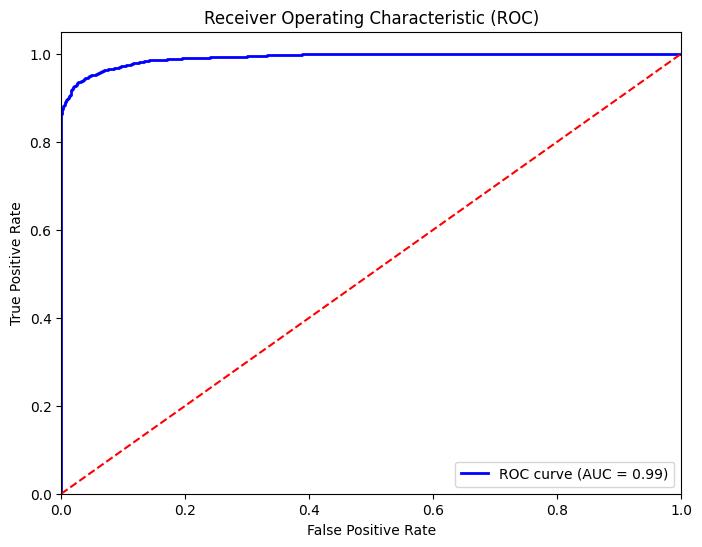

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# probability scores for the positive class
y_scores = linear_clf.predict_proba(test_X)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# SVM


In [54]:
# SVM Linear
svm = SVC(probability=True)
svm.fit(train_X, train_y)
svm_predictions = linear_svm.predict(test_X)
print("SVM - Classification Report")
print(classification_report(test_y, svm_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, svm_predictions))


SVM - Classification Report
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      2950
           1       0.99      0.92      0.95      3050

    accuracy                           0.95      6000
   macro avg       0.96      0.95      0.95      6000
weighted avg       0.96      0.95      0.95      6000

Confusion Matrix
[[2911   39]
 [ 240 2810]]


In [30]:
# fine tune for using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization parameter
    'gamma': [0.001, 0.01, 0.1, 1],   # Kernel coefficient
    'kernel': ['linear', 'rbf']  # Different kernels
}
svm = SVC()
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1')
grid_search_svm.fit(train_X, train_y)
print("Best Parameters:", grid_search_svm.best_params_)
print("Best F1-Score:", grid_search_svm.best_score_)

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best F1-Score: 0.9958525950844311


In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

# Define the tuned SVM kernel
svm_tuned = SVC(kernel='rbf', C=100, gamma=0.1,probability=True)

# Perform cross-validation
cv_scores = cross_val_score(svm_tuned, train_X, train_y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Fit the tuned SVM model on the training data
svm_tuned.fit(train_X, train_y)

# Make predictions on the test data
svm_predictions = svm_tuned.predict(test_X)

# Evaluate the model's performance
print("RBF Kernel SVM - Classification Report")
print(classification_report(test_y, svm_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, svm_predictions))


Cross-validation scores: [0.99607143 0.99642857 0.9975     0.99642857 0.99285714]
Mean CV accuracy: 0.9958571428571428
RBF Kernel SVM - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2950
           1       1.00      1.00      1.00      3050

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Confusion Matrix
[[2943    7]
 [   4 3046]]


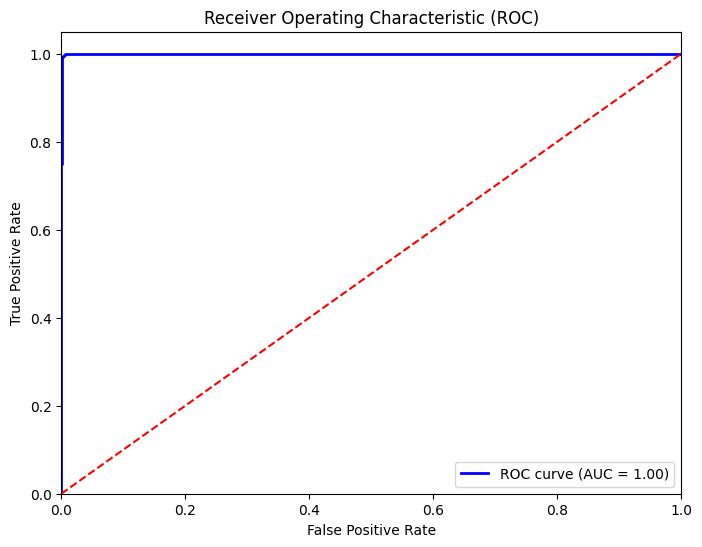

In [56]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# cross-validation predictions
y_scores_cv = cross_val_predict(svm_tuned, train_X, train_y, cv=5, method="decision_function")

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(train_y, y_scores_cv)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Classifier

In [35]:
#DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=seed)
decision_tree.fit(train_X, train_y)

decision_tree_predictions = decision_tree.predict(test_X)
decision_tree_report = classification_report(test_y, decision_tree_predictions)
decision_tree_cm = confusion_matrix(test_y, decision_tree_predictions)

print("Decision Tree - Classification Report")
print(decision_tree_report)
print("Confusion Matrix")
print(decision_tree_cm)


Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2950
           1       0.97      0.98      0.98      3050

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Confusion Matrix
[[2856   94]
 [  49 3001]]


In [36]:
from sklearn.tree import DecisionTreeClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

param_grid_decision_tree = {
    'criterion': ['entropy'],  # criterion
    'max_depth': [None, 5, 10, 15],  # Max depth of the tree
    'min_samples_split': [5, 10, 15, 20],  # Min number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3],  # Min number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None] ,  # Number of features to consider when looking for the best split
}

decision_tree = DecisionTreeClassifier(random_state=seed)
grid_search_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, cv=5, scoring='f1')
grid_search_decision_tree.fit(train_X, train_y)

print("Best Parameters:", grid_search_decision_tree.best_params_)

print("Best F1-Score:", grid_search_decision_tree.best_score_)


C:\Users\alimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
240 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alimi\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\alimi\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\alimi\anaconda3\lib\site-packag

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best F1-Score: 0.9755782265780898


In [37]:
# tuned DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy',
                                       max_depth=None,
                                       max_features=None,  
                                       min_samples_leaf=1,
                                       min_samples_split=5,
                                       random_state=seed)
decision_tree.fit(train_X, train_y)

decision_tree_predictions = decision_tree.predict(test_X)
decision_tree_report = classification_report(test_y, decision_tree_predictions)
decision_tree_cm = confusion_matrix(test_y, decision_tree_predictions)

print("Decision Tree - Classification Report")
print(decision_tree_report)
print("Confusion Matrix")
print(decision_tree_cm)

# improved f1-score, confusion matrix result

Decision Tree - Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2950
           1       0.98      0.99      0.98      3050

    accuracy                           0.98      6000
   macro avg       0.98      0.98      0.98      6000
weighted avg       0.98      0.98      0.98      6000

Confusion Matrix
[[2885   65]
 [  38 3012]]


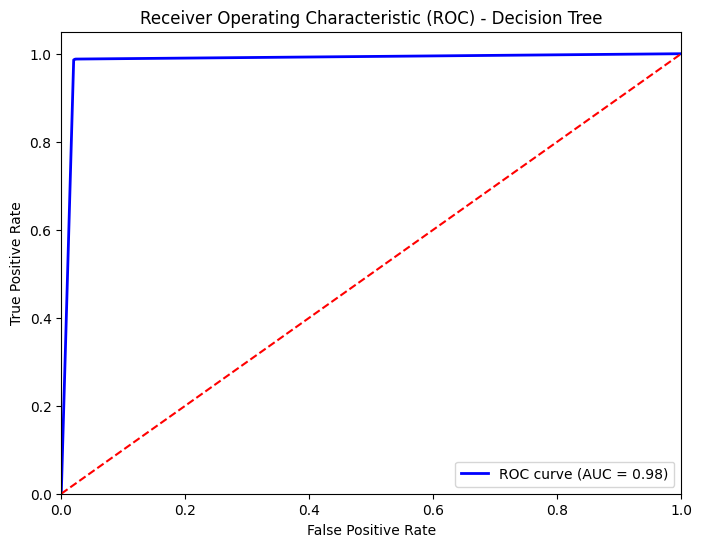

In [38]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# probability scores for the positive class
y_scores = decision_tree.predict_proba(test_X)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Decision Tree')
plt.legend(loc="lower right")
plt.show()

## Random Forest


In [39]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=seed)
random_forest.fit(train_X, train_y)
rf_predictions = random_forest.predict(test_X)
print("Random Forest - Classification Report")
print(classification_report(test_y, rf_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, rf_predictions))

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2950
           1       1.00      0.99      1.00      3050

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Confusion Matrix
[[2943    7]
 [  18 3032]]


In [40]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_grid_random_forest = {
    'n_estimators': [100, 200, 300],           # Number of trees in the forest
    'criterion': ['gini', 'entropy'],          # Splitting criterion
    'max_depth': [None, 5, 10, 20],            # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider when looking for the best split
}
random_forest = RandomForestClassifier(random_state=seed)
grid_search_random_forest = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_random_forest, n_iter=50, cv=5, scoring='f1')
grid_search_random_forest.fit(train_X, train_y)
print("Best Parameters:", grid_search_random_forest.best_params_)
print("Best F1-Score:", grid_search_random_forest.best_score_)

C:\Users\alimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\alimi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\alimi\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\alimi\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\alimi\anaconda3\lib\site-packages

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'criterion': 'entropy'}
Best F1-Score: 0.9929435892074417


In [41]:
best_params = {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'entropy'}
random_forest = RandomForestClassifier(**best_params)
random_forest.fit(train_X, train_y)
rf_predictions = random_forest.predict(test_X)
print("Random Forest - Classification Report")
print(classification_report(test_y, rf_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, rf_predictions))

# Slight improve f1-score and precision for class 1

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2950
           1       1.00      1.00      1.00      3050

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Confusion Matrix
[[2943    7]
 [  13 3037]]


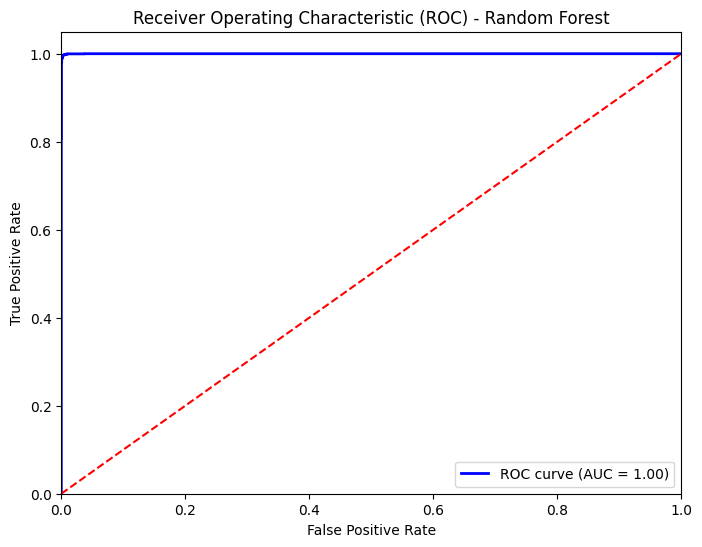

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# probability scores for the positive class
y_scores = random_forest.predict_proba(test_X)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Random Forest')
plt.legend(loc="lower right")
plt.show()


## VotingClassifier using Soft Voting

In [58]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Initialize base estimators with appropriate settings
#linear_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
svm = SVC(kernel='rbf', probability=True)

# Create the VotingClassifier with soft voting
voting_clf = VotingClassifier(estimators=[
    
    ('rbf_svm', svm_tuned),
    ('dt', decision_tree),
    ('rf', random_forest)],
    voting='soft')

# Train the VotingClassifier
voting_clf.fit(train_X, train_y)

# Predict using the voting classifier
voting_predictions = voting_clf.predict(test_X)
print("Voting Classifier (soft Voting) - Classification Report")
print(classification_report(test_y, voting_predictions))
print("Confusion Matrix")
print(confusion_matrix(test_y, voting_predictions))


Voting Classifier (soft Voting) - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2950
           1       1.00      1.00      1.00      3050

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000

Confusion Matrix
[[2944    6]
 [   6 3044]]


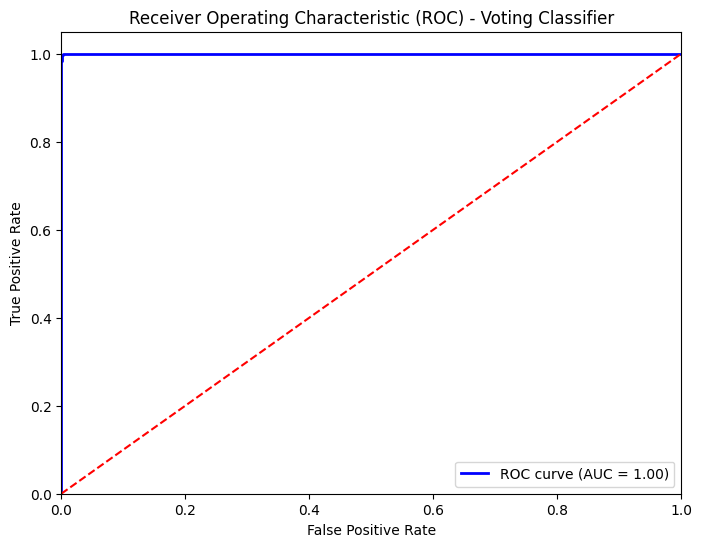

In [59]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# probability scores for the positive class (class 1)
y_scores = voting_clf.predict_proba(test_X)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(test_y, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Voting Classifier')
plt.legend(loc="lower right")
plt.show()

In [61]:
import joblib
joblib.dump(voting_clf, 'D:/centennialcollege/winter2024/Comp247/groupproject/voting_clf.pkl') 
joblib.dump(pipeline, 'D:/centennialcollege/winter2024/Comp247/groupproject/pipeline.pkl') 


['D:/centennialcollege/winter2024/Comp247/groupproject/pipeline.pkl']